## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten
# Datenanalyse der Hauptstudie 2018

#### Daten importieren

In [147]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
sns.set(style="white") #"whitegrid", "darkgrid"...
% pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Martina\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2018_ber')

In [3]:
Daten.shape

(303, 358)

In [4]:
Daten.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b22a_5,D-Q8b22a_6,D-Q8b22a_7,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9_1,D-Q9_2,E-Q1,porc_nan
0,2018-02-07 13:36:43,2018-02-07 13:50:01,0,83.47.61.251,100,797,1,2018-02-07 13:50:03,R_30ugRXCZSq8xMsk,0,...,0,0,0,0,0,0,0,1,0,59.523810
1,2018-02-08 02:38:26,2018-02-08 03:09:12,0,84.126.137.166,100,1845,1,2018-02-08 03:09:13,R_1eV2zm3mlcaUK2x,0,...,0,0,0,0,0,0,0,1,0,55.238095
2,2018-02-08 03:47:29,2018-02-08 04:05:38,0,79.109.193.215,100,1089,1,2018-02-08 04:05:39,R_czEmSnFHhfZOTL3,0,...,0,0,0,0,0,0,0,1,0,58.095238


#### Glossar erstellen

Datei aufrufen, die in einem anderem Notebook erstellt und gespeichert wurde

In [5]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

Funktion, um Index (Name) einer Bezeichnung im Glossar zu finden:

In [6]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

Funktion, um Bezeichnung von Index im Glossar zu finden:

In [7]:
def get_name_glossind(word):
    for i, val in enumerate(gloss.index):
        if word.lower() in str(val).lower():
            return i, gloss.loc[val][0]

In [8]:
get_name_glossind('A-Q1')

(17,
 'Probablemente, en este texto encuentre palabras o grupos de palabras que no conoce aún. Sin embargo, seguro que logra entender algunas de estas palabras nuevas sin ayuda, bien enseguida o después de pensar un poco. Lea el texto y piense qué hace para descubrir el significado o la función de las palabras que desconoce. También puede pensar en otras situaciones en las que se haya encontrado con vocabulario nuevo.  ¿Qué estrategias o técnicas usa para averiguar el significado de palabras desconocidas? ¿Qué características de las palabras, frases o textos le ayudan?               Apunte todas sus ideas aquí:')

#### Untergruppen und Listen für die Analyse

In [9]:
Daten_A3 = Daten[Daten['A-Q3_27'] >= 1]

In [10]:
Daten_A3.shape

(300, 358)

In [11]:
Finished = Daten[Daten['Finished'] == '1'].reset_index(drop=True)

In [12]:
Finished.shape

(294, 358)

Liste erstellen:

In [13]:
Liste_A_Q2 = [col for col in Daten.columns if 'A-Q2' in col]

In [14]:
Liste_A_Q3 = [col for col in Daten.columns if 'A-Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [15]:
Liste_C_Q1 = [col for col in Finished.columns if 'C-Q1' in col]

##### Visualisierung

Funktion für Darstellung mehrerer Histogramme:

In [16]:
def graf_hist(D,l,sx,sy,nrow,ncol):
    fig = plt.figure(figsize=(sx,sy))
    for i, col in enumerate(l):
        plt.subplot(nrow,ncol,i+1)
        plt.hist(D[col].dropna(),color = '#0063A6')
        plt.xticks([1,2,3,4,5])
        plt.title(col,size=13)
    plt.show()

Funktion für Darstellung der Likert-Skalen:

In [145]:
def graf_likert(D,l,sy):

    likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

    df = D[l].apply(pd.value_counts).T
    middles = df[[1, 2]].sum(axis=1)+df[3]*.5
    longest = middles.max()
    complete_longest = df.sum(axis=1).max()
    df.insert(0, '', (middles - longest).abs())

    df.plot.barh(stacked=True, figsize=(8,sy), color=likert_colors, edgecolor='none', legend=False)
    z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
    z.set_zorder(-1)

    plt.show()

##### Korrelation

Funktion, um Daten mit bestimmtem Korrelationswert (z.B. über 0,5) zu erhalten:

In [17]:
def get_max_corr(df,col,lim = 0.5):
    return df[(df[col] > lim) & (df[col].dropna() < 0.99)][col]

### Cronbach's Alpha berechnen

In [18]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha

In [19]:
CronbachAlpha(Daten[Liste_A_Q2])

0.25915134559344694

In [20]:
CronbachAlpha(Daten_A3[Liste_A_Q3])

0.8895811333745897

In [21]:
CronbachAlpha(Finished[Liste_C_Q1])

0.5104733681971647

In [22]:
Liste_A_Q = Liste_A_Q2 + Liste_A_Q3

In [23]:
Liste_AC_Q = Liste_A_Q + Liste_C_Q1

In [24]:
CronbachAlpha(Daten[Liste_AC_Q])

0.9092180930882015

### Zeitanalyse

In [25]:
Dur = pd.to_numeric(Finished['Duration (in seconds)'])

In [26]:
Dur.describe()

count       294.000000
mean       4713.979592
std       33957.223961
min         346.000000
25%         703.250000
50%        1066.000000
75%        1370.500000
max      535186.000000
Name: Duration (in seconds), dtype: float64

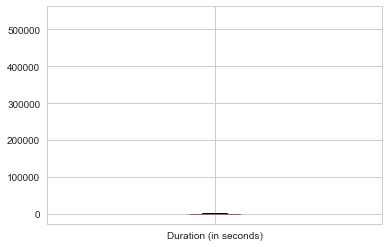

In [27]:
Dur.plot.box();

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyers zu erkennen -> sollen nicht mit berücksichtigt werden (z.B. TN, die an einem Tag begonnen und später beendet haben...)

sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen

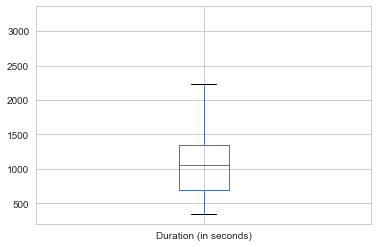

In [28]:
Dur[Dur < 4000].plot.box();

In [29]:
Dur[Dur < 4000].describe()

count     283.000000
mean     1076.784452
std       488.428468
min       346.000000
25%       695.000000
50%      1049.000000
75%      1344.000000
max      3215.000000
Name: Duration (in seconds), dtype: float64

In [30]:
(Dur[Dur < 4000].mean())/60

17.94640753828033

Schlussfolgerung:

durchschnittliche Beantwortungszeit liegt bei ca. 18min, wobei berücksichtigt werden muss, dass TN außerhalb des Unterrichts Pausen einlegen konnten und dass z.T. bei der Beantwortung im Unterricht mehr Zeit für Erklärungen/Einloggen/Abwarten... verwendet wurde

### Analyse der Strategiennutzung

#### A-Q2 (7 Hauptbereiche)

In [31]:
Daten[Liste_A_Q2].describe()

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,2.557756,3.537954,3.792079,4.003300,3.402640,3.287129,4.333333
std,1.077677,0.878955,0.983138,1.014786,0.984781,1.156639,0.852214
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000
50%,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000
75%,3.000000,4.000000,4.500000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


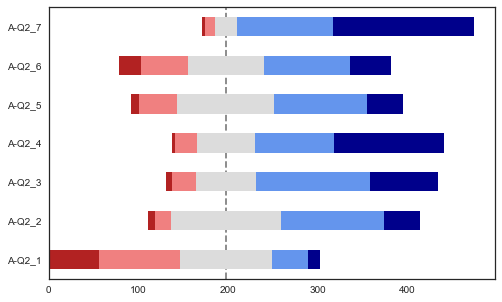

In [150]:
graf_likert(Daten,Liste_A_Q2,5)

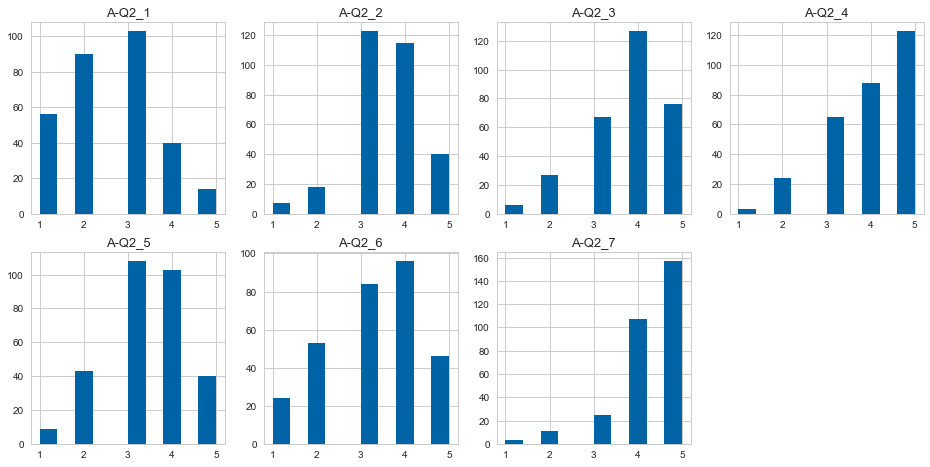

In [32]:
graf_hist(Daten,Liste_A_Q2,16,12,3,4)

1
Descubro el significado o la función de palabras nuevas en alemán gracias a mi lengua materna.

2
Descubro el significado o la función de palabras nuevas en alemán con la ayuda de otras lenguas.

3
Utilizo mis conocimientos de alemán, p. ej. otras palabras conocidas, clases de palabras o la formación de palabras compuestas. 

4
Utilizo información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto.

5
Pido ayuda a mi profesor/a.

6
Pido ayuda a mis compañeros/as de clase.

7
Consulto un diccionario u otra fuente (en papel o digital).


In [33]:
Daten[Liste_A_Q2].mean().sort_values(ascending = False)

A-Q2_7    4.333333
A-Q2_4    4.003300
A-Q2_3    3.792079
A-Q2_2    3.537954
A-Q2_5    3.402640
A-Q2_6    3.287129
A-Q2_1    2.557756
dtype: float64

Korrelation in A-Q2:

In [34]:
Korr_A_Q2 = Daten[Liste_A_Q2].corr(method = 'spearman')
Korr_A_Q2

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
A-Q2_1,1.000000,0.297884,0.012845,0.021539,-0.003129,-0.062050,-0.140620
A-Q2_2,0.297884,1.000000,0.239564,0.178163,-0.039325,-0.147182,-0.228691
A-Q2_3,0.012845,0.239564,1.000000,0.507829,-0.055782,-0.168743,0.116542
A-Q2_4,0.021539,0.178163,0.507829,1.000000,-0.082848,-0.179259,0.049256
A-Q2_5,-0.003129,-0.039325,-0.055782,-0.082848,1.000000,0.492029,0.103701
A-Q2_6,-0.062050,-0.147182,-0.168743,-0.179259,0.492029,1.000000,0.118956
A-Q2_7,-0.140620,-0.228691,0.116542,0.049256,0.103701,0.118956,1.000000


In [35]:
get_max_corr(Korr_A_Q2,'A-Q2_1', lim = 0.4)

Series([], Name: A-Q2_1, dtype: float64)

In [36]:
for col in Liste_A_Q2:
    print(get_max_corr(Korr_A_Q2,col,0.4))

Series([], Name: A-Q2_1, dtype: float64)
Series([], Name: A-Q2_2, dtype: float64)
A-Q2_4    0.507829
Name: A-Q2_3, dtype: float64
A-Q2_3    0.507829
Name: A-Q2_4, dtype: float64
A-Q2_6    0.492029
Name: A-Q2_5, dtype: float64
A-Q2_5    0.492029
Name: A-Q2_6, dtype: float64
Series([], Name: A-Q2_7, dtype: float64)


#### A-Q3 (31 Einzelstrategien)

In [37]:
Daten_A3[Liste_A_Q3].describe()

,A-Q3_1,A-Q3_2,A-Q3_3,A-Q3_4,A-Q3_5,A-Q3_6,A-Q3_7,A-Q3_8,A-Q3_9,A-Q3_28,...,A-Q3_20,A-Q3_21,A-Q3_22,A-Q3_23,A-Q3_24,A-Q3_25,A-Q3_30,A-Q3_31,A-Q3_26,A-Q3_27
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3.073333,3.953333,2.983333,2.866667,2.500000,3.743333,3.516667,3.580000,3.870000,3.736667,...,4.216667,2.696667,3.770000,3.580000,3.266667,3.643333,3.913333,3.510000,3.543333,3.443333
std,1.213617,0.938487,1.291750,1.202932,1.230874,1.099158,1.146343,1.163951,1.078724,1.060379,...,0.897631,1.195584,1.089828,1.083596,1.119404,1.276016,0.994545,1.110862,1.094890,1.202056
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,4.000000,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.500000
75%,4.000000,5.000000,4.000000,4.000000,3.250000,5.000000,4.000000,4.000000,5.000000,5.000000,...,5.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


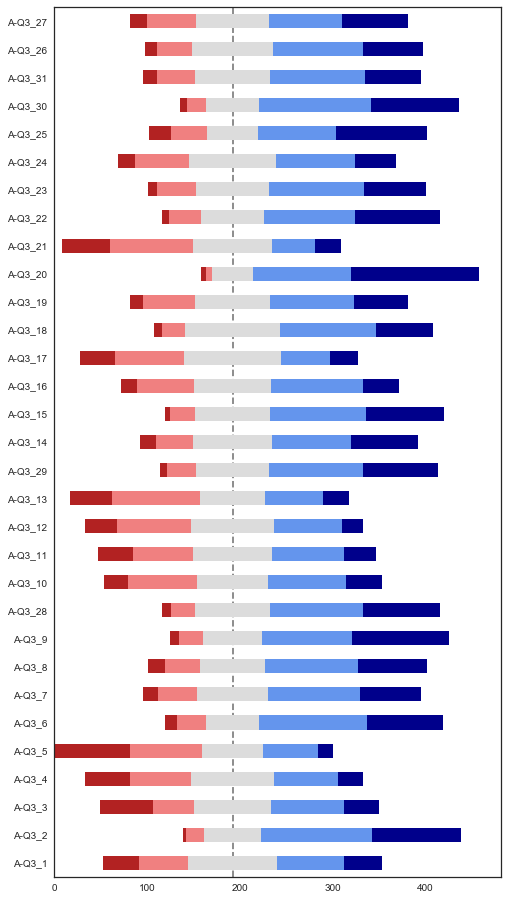

In [151]:
graf_likert(Daten_A3,Liste_A_Q3,16)

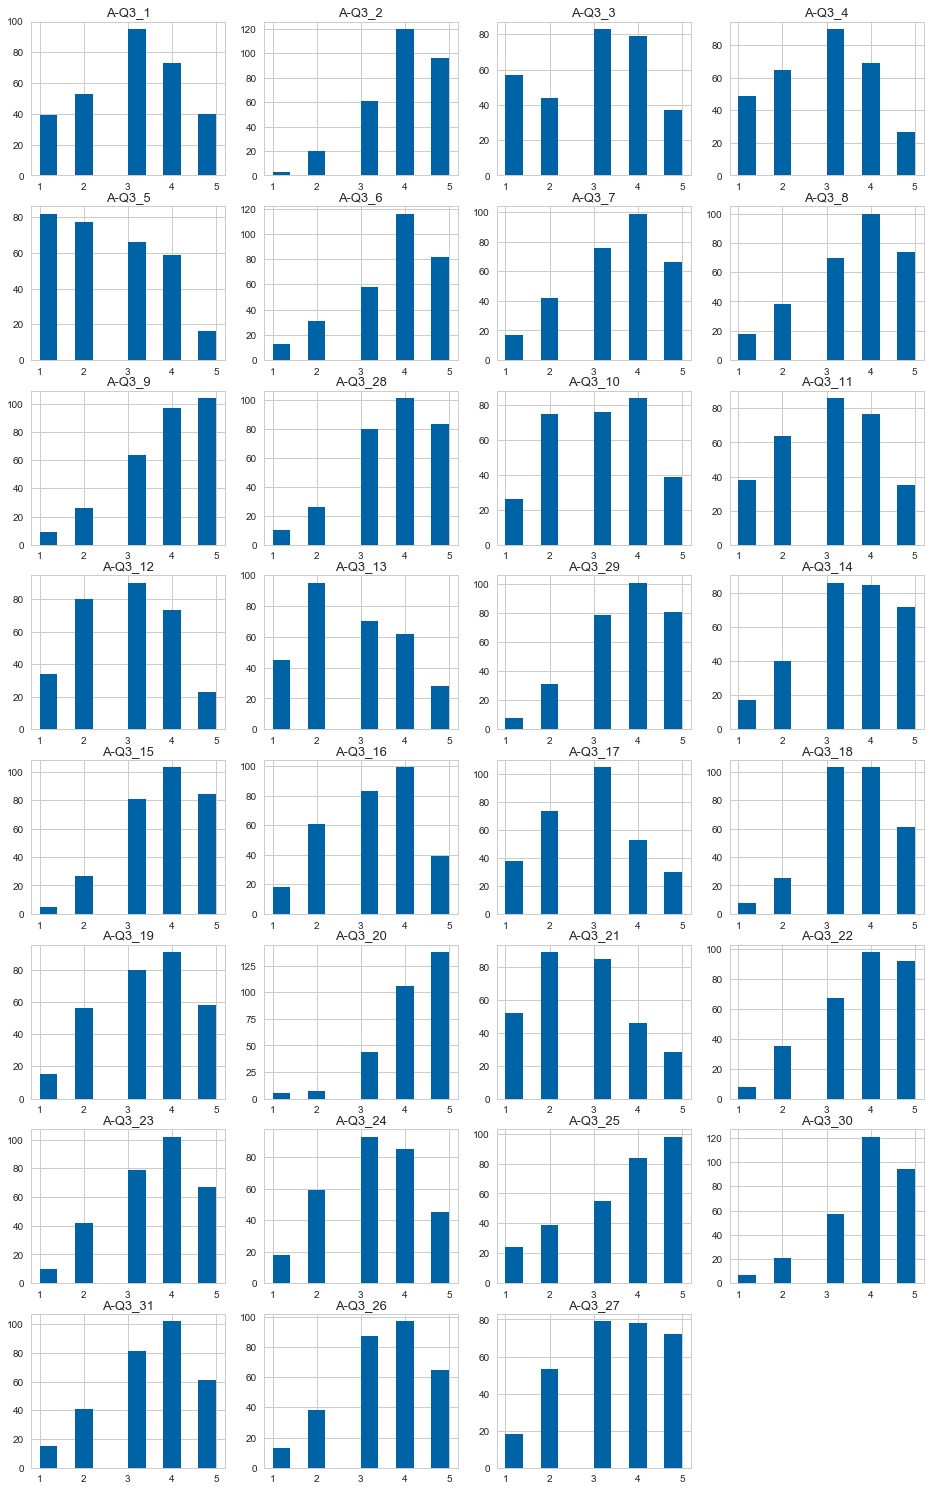

In [38]:
graf_hist(Daten_A3,Liste_A_Q3,16,30,9,4)

In [39]:
Daten_A3[Liste_A_Q3].mean().sort_values(ascending = False)

A-Q3_20    4.216667
A-Q3_2     3.953333
A-Q3_30    3.913333
A-Q3_9     3.870000
A-Q3_15    3.780000
A-Q3_22    3.770000
A-Q3_6     3.743333
A-Q3_28    3.736667
A-Q3_29    3.720000
A-Q3_25    3.643333
A-Q3_18    3.613333
A-Q3_23    3.580000
A-Q3_8     3.580000
A-Q3_26    3.543333
A-Q3_7     3.516667
A-Q3_14    3.516667
A-Q3_31    3.510000
A-Q3_27    3.443333
A-Q3_19    3.403333
A-Q3_16    3.266667
A-Q3_24    3.266667
A-Q3_10    3.116667
A-Q3_1     3.073333
A-Q3_11    3.023333
A-Q3_3     2.983333
A-Q3_12    2.903333
A-Q3_17    2.876667
A-Q3_4     2.866667
A-Q3_13    2.776667
A-Q3_21    2.696667
A-Q3_5     2.500000
dtype: float64

In [40]:
get_name_glossind('A-Q3_20')

(47, 'A-Q3 - Utilizo el sentido común y mis conocimientos generales.')

In [41]:
Daten_A3[Liste_A_Q3].std().sort_values()

A-Q3_20    0.897631
A-Q3_2     0.938487
A-Q3_18    0.986780
A-Q3_30    0.994545
A-Q3_15    1.007464
A-Q3_29    1.054501
A-Q3_28    1.060379
A-Q3_9     1.078724
A-Q3_23    1.083596
A-Q3_22    1.089828
A-Q3_26    1.094890
A-Q3_6     1.099158
A-Q3_16    1.107389
A-Q3_31    1.110862
A-Q3_24    1.119404
A-Q3_12    1.124665
A-Q3_19    1.142368
A-Q3_7     1.146343
A-Q3_17    1.148558
A-Q3_14    1.157954
A-Q3_8     1.163951
A-Q3_10    1.177999
A-Q3_21    1.195584
A-Q3_27    1.202056
A-Q3_4     1.202932
A-Q3_11    1.203168
A-Q3_13    1.204835
A-Q3_1     1.213617
A-Q3_5     1.230874
A-Q3_25    1.276016
A-Q3_3     1.291750
dtype: float64

Korrelation in A-Q3:

In [42]:
Korr_A_Q3 = Daten[Liste_A_Q3].corr(method = 'spearman')
Korr_A_Q3

,A-Q3_1,A-Q3_2,A-Q3_3,A-Q3_4,A-Q3_5,A-Q3_6,A-Q3_7,A-Q3_8,A-Q3_9,A-Q3_28,...,A-Q3_20,A-Q3_21,A-Q3_22,A-Q3_23,A-Q3_24,A-Q3_25,A-Q3_30,A-Q3_31,A-Q3_26,A-Q3_27
A-Q3_1,1.000000,0.357553,0.291868,0.172885,0.225569,0.023251,-0.016825,-0.000882,-0.017741,0.069743,...,0.142571,0.025817,0.045151,0.019735,0.041916,-0.021745,0.038881,0.086870,0.112402,0.024440
A-Q3_2,0.357553,1.000000,0.396476,0.288819,0.279599,0.178014,0.121506,0.070285,0.127024,0.174471,...,0.215636,-0.031629,0.103122,0.073171,0.160499,0.029154,0.183555,0.071202,0.212786,0.117747
A-Q3_3,0.291868,0.396476,1.000000,0.257619,0.247308,0.075639,0.039432,0.022347,0.042917,0.140144,...,0.123009,0.086699,0.111983,0.050676,0.186951,0.055161,0.061233,0.156535,0.170856,0.148300
A-Q3_4,0.172885,0.288819,0.257619,1.000000,0.298090,0.045292,0.036043,-0.036058,0.048596,0.095621,...,0.065620,0.176829,0.180900,0.128523,0.128895,0.095209,0.129381,0.081840,0.108601,0.183761
A-Q3_5,0.225569,0.279599,0.247308,0.298090,1.000000,0.275893,0.216315,0.174144,0.186116,0.151106,...,0.150077,0.229452,0.139250,0.173750,0.179840,0.124844,0.095624,0.177069,0.233599,0.221648
A-Q3_6,0.023251,0.178014,0.075639,0.045292,0.275893,1.000000,0.751294,0.652305,0.480994,0.259175,...,0.302094,0.108778,0.102785,0.157296,0.170142,0.074010,0.221181,0.063626,0.229312,0.207146
A-Q3_7,-0.016825,0.121506,0.039432,0.036043,0.216315,0.751294,1.000000,0.730273,0.479557,0.251117,...,0.322451,0.136351,0.117612,0.158131,0.160571,0.120226,0.235766,0.141976,0.251914,0.197192
A-Q3_8,-0.000882,0.070285,0.022347,-0.036058,0.174144,0.652305,0.730273,1.000000,0.596137,0.272614,...,0.331465,0.187987,0.136888,0.183288,0.213335,0.129416,0.238670,0.117627,0.219000,0.234366
A-Q3_9,-0.017741,0.127024,0.042917,0.048596,0.186116,0.480994,0.479557,0.596137,1.000000,0.316212,...,0.303081,0.159486,0.085078,0.186260,0.187388,0.101801,0.251411,0.177669,0.212490,0.271956
A-Q3_28,0.069743,0.174471,0.140144,0.095621,0.151106,0.259175,0.251117,0.272614,0.316212,1.000000,...,0.340431,0.032734,0.210102,0.240450,0.187554,0.066112,0.215293,0.284998,0.344093,0.182695


In [43]:
for col in Liste_A_Q3:
    print(get_max_corr(Korr_A_Q3,col,0.6))

Series([], Name: A-Q3_1, dtype: float64)
Series([], Name: A-Q3_2, dtype: float64)
Series([], Name: A-Q3_3, dtype: float64)
Series([], Name: A-Q3_4, dtype: float64)
Series([], Name: A-Q3_5, dtype: float64)
A-Q3_7    0.751294
A-Q3_8    0.652305
Name: A-Q3_6, dtype: float64
A-Q3_6    0.751294
A-Q3_8    0.730273
Name: A-Q3_7, dtype: float64
A-Q3_6    0.652305
A-Q3_7    0.730273
Name: A-Q3_8, dtype: float64
Series([], Name: A-Q3_9, dtype: float64)
Series([], Name: A-Q3_28, dtype: float64)
Series([], Name: A-Q3_10, dtype: float64)
A-Q3_12    0.611488
Name: A-Q3_11, dtype: float64
A-Q3_11    0.611488
Name: A-Q3_12, dtype: float64
Series([], Name: A-Q3_13, dtype: float64)
Series([], Name: A-Q3_29, dtype: float64)
Series([], Name: A-Q3_14, dtype: float64)
Series([], Name: A-Q3_15, dtype: float64)
Series([], Name: A-Q3_16, dtype: float64)
Series([], Name: A-Q3_17, dtype: float64)
Series([], Name: A-Q3_18, dtype: float64)
Series([], Name: A-Q3_19, dtype: float64)
Series([], Name: A-Q3_20, dtype: 

In [44]:
get_name_glossind('A-Q3_23')

(50, 'A-Q3 - Me fijo en cifras o en otros símbolos que entiendo.')

##### Gruppierung der Strategien nach Kategorien:

In [45]:
strat = {'S1': ['A-Q3_5','A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9'], 
         'S2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
         'S3': ['A-Q3_9','A-Q3_10','A-Q3_11','A-Q3_12'],
         'S4': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S4a': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16'],
         'S4b': ['A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24','A-Q3_25'],
         'S6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

* S1: Auf Wortebene - intralingual
* S2: Auf Wortebene - interlingual
* S3: Auf Satz- und Textebene - engerer Kontext
* S4: Auf Satz- und Textebene - weiterer Kontext (S4a: intratextuell, S4b: Bezug zu Fach- und Weltwissen)
* S5: Außersprachlicher Kontext
* S6: Metakognitive Strategien

In [46]:
#Daten_A3.loc[56, strat['S1']]

In [47]:
#Berechnung der Summe der Werte, des Mittelwerts und der Anzahl an Items mit einem bestimmten Wert (individuell):
#Daten.loc[56, strat['S1']].sum()
#Daten.loc[56, strat['S1']].mean()
#(Daten.loc[56, strat['S1']] >= 5).sum()

In [48]:
#Anzahl der TN, die einen Mittelwert >= 3 in der Strategiengruppe S1 aufweisen:
#Daten[Daten[strat['S1']].mean(axis=1) >= 3]

In [49]:
#Anzahl de#Anzahl der TN, die einen Mittelwert >= 3 in der Strategiengruppe S1 aufweisen:r TN, deren Summe der Werte in S1 >= 8 ist:
#Daten[Daten[strat['S1']].sum(axis=1) >= 8].shape[0]

##### Bandbreite und Frequenz der Strategiennutzung:

In der Folge wird berechnet, wie viele TN pro Strategiengruppe mit ihren Angaben einen Durchschnittswert von 3 (Likert) aufweisen und eine Mindestanzahl an Einzelstrategien pro Gruppe mit 3 bewertet haben.

In [50]:
Daten_A3[(Daten_A3[strat['S1']].mean(axis=1) >= 3) & ((Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2)].shape[0]

227

In [51]:
Daten_A3[(Daten_A3[strat['S2']].mean(axis=1) >= 3) & ((Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2)].shape[0]

177

In [52]:
Daten_A3[(Daten_A3[strat['S3']].mean(axis=1) >= 3) & ((Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2)].shape[0]

195

In [53]:
Daten_A3[(Daten_A3[strat['S4']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4)].shape[0]

230

In [54]:
Daten_A3[(Daten_A3[strat['S4a']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4a']] >= 3).sum(axis=1) >= 2)].shape[0]

213

In [55]:
Daten_A3[(Daten_A3[strat['S4b']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4b']] >= 3).sum(axis=1) >= 2)].shape[0]

238

In [56]:
Daten_A3[(Daten_A3[strat['S5']].mean(axis=1) >= 3) & ((Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2)].shape[0]

228

In [57]:
Daten_A3[(Daten_A3[strat['S6']].mean(axis=1) >= 3) & ((Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3)].shape[0]

260

Anzahl der TN, die in jeder Strategiengruppe einen Durchschnittswert von mindestens 2 (Likert) aufweisen und eine Mindestanzahl an Strategien mit 3 bewertet haben:

In [58]:
Daten_A3[(Daten_A3[strat['S1']].mean(axis=1) >= 2) & ((Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S2']].mean(axis=1) >= 2) & ((Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S3']].mean(axis=1) >= 2) & ((Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S4']].mean(axis=1) >= 2) & ((Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4) & (Daten_A3[strat['S5']].mean(axis=1) >= 2) & ((Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S6']].mean(axis=1) >= 2) & ((Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3)].shape[0]

183

Anzahl und Prozentsatz der TN, die eine Mindestanzahl an Strategien aus jeder Strategiengruppe mit 3 (Likert) bewertet haben:

In [59]:
def get_good_str(df):
    df_good = df[((df[strat['S1']] >= 3).sum(axis=1) >= 2) & ((df[strat['S2']] >= 3).sum(axis=1) >= 2) & ((df[strat['S3']] >= 3).sum(axis=1) >= 2) & ((df[strat['S4']] >= 3).sum(axis=1) >= 4) & ((df[strat['S5']] >= 3).sum(axis=1) >= 2) & ((df[strat['S6']] >= 3).sum(axis=1) >= 3)]
    return df_good.shape[0], (df_good.shape[0])/(df.shape[0])*100

In [60]:
get_good_str(Daten_A3)

(187, 62.33333333333333)

### Erwerb von Erschließungsstrategien

#### B-Q1 (Kontexte des Strategienerwerbs)

In [61]:
Kontexte = Finished[['B-Q1_1','B-Q1_2','B-Q1_3','B-Q1_4','B-Q1_5','B-Q1_6','B-Q1_7','B-Q1_8','B-Q1_9','B-Q1_10','B-Q1_11']]

In [62]:
DF_Kontexte = Kontexte.apply(pd.value_counts).fillna(0).astype(integer)

In [63]:
DF_Kontexte.iloc[1].sort_values(ascending = False)

B-Q1_7     181
B-Q1_2     169
B-Q1_9     166
B-Q1_3     135
B-Q1_6     115
B-Q1_1     107
B-Q1_5     102
B-Q1_4      89
B-Q1_8      70
B-Q1_10     15
B-Q1_11      8
Name: 1, dtype: int32

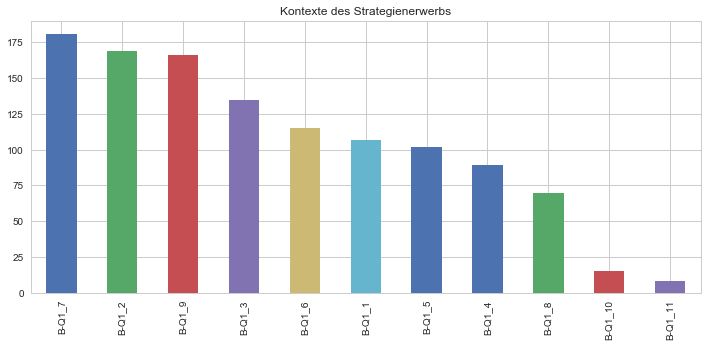

In [64]:
DF_Kontexte.iloc[1].sort_values(ascending = False).plot(kind='bar', 
                                                            figsize = (12,5), width = 0.5, 
                                                            legend = False, title = "Kontexte des Strategienerwerbs");

* 1- En las clases de Lengua y Literatura en el colegio o instituto
* 2- En las clases de inglés en el colegio o instituto
* 3- En otras clases de idiomas en el colegio o instituto
* 4- En clases de alemán anteriores en la Universidad
* 5- En otras asignaturas de mi carrera universitaria
* 6- En clases de lenguas en escuelas de idiomas o academias
* 7- En mi curso de alemán actual
* 8- En mi familia, con mis amigos/as o compañeros/as de clase
* 9- Por mi cuenta, sin ayuda de otras personas
* 10- Otros:
* 11- No sé cómo he aprendido estas estrategias.

#### B-Q2 (Methoden des Strategienerwerbs)

Erwerbskontexte:

In [65]:
erwerb = {'E1': ['B-Q2-1_1','B-Q2-1_2','B-Q2-1_3','B-Q2-1_4','B-Q2-1_5','B-Q2-1_6','B-Q2-1_7'], 
         'E2': ['B-Q2-2_1','B-Q2-2_2','B-Q2-2_3','B-Q2-2_4','B-Q2-2_5','B-Q2-2_6','B-Q2-2_7'],
         'E3': ['B-Q2-3_1','B-Q2-3_2','B-Q2-3_3','B-Q2-3_4','B-Q2-3_5','B-Q2-3_6','B-Q2-3_7'],
         'E4': ['B-Q2-4_1','B-Q2-4_2','B-Q2-4_3','B-Q2-4_4','B-Q2-4_5','B-Q2-4_6','B-Q2-4_7'],
         'E5': ['B-Q2-5_1','B-Q2-5_2','B-Q2-5_3','B-Q2-5_4','B-Q2-5_5','B-Q2-5_6','B-Q2-5_7'],
         'E6': ['B-Q2-6_1','B-Q2-6_2','B-Q2-6_3','B-Q2-6_4','B-Q2-6_5','B-Q2-6_6','B-Q2-6_7'],
         'E7': ['B-Q2-7_1','B-Q2-7_2','B-Q2-7_3','B-Q2-7_4','B-Q2-7_5','B-Q2-7_6','B-Q2-7_7'],
         'E8': ['B-Q2-8_1','B-Q2-8_2','B-Q2-8_3','B-Q2-8_4','B-Q2-8_5'],
         'E9': ['B-Q2-9_1','B-Q2-9_2','B-Q2-9_3','B-Q2-9_4','B-Q2-9_5']}

Methoden des Stragienerwerbs (kontextübergreifend in Unterrichtssituationen):

In [66]:
erwerb1 = {'U1': ['B-Q2-1_1','B-Q2-2_1','B-Q2-3_1','B-Q2-4_1','B-Q2-5_1','B-Q2-6_1','B-Q2-7_1'], 
         'U2': ['B-Q2-1_2','B-Q2-2_2','B-Q2-3_2','B-Q2-4_2','B-Q2-5_2','B-Q2-6_2','B-Q2-7_2'],
         'U3': ['B-Q2-1_3','B-Q2-2_3','B-Q2-3_3','B-Q2-4_3','B-Q2-5_3','B-Q2-6_3','B-Q2-7_3'],
         'U4': ['B-Q2-1_4','B-Q2-2_4','B-Q2-3_4','B-Q2-4_4','B-Q2-5_4','B-Q2-6_4','B-Q2-7_4'],
         'U5': ['B-Q2-1_5','B-Q2-2_5','B-Q2-3_5','B-Q2-4_5','B-Q2-5_5','B-Q2-6_5','B-Q2-7_5'],
         'U6': ['B-Q2-1_6','B-Q2-2_6','B-Q2-3_6','B-Q2-4_6','B-Q2-5_6','B-Q2-6_6','B-Q2-7_6'],
         'U7': ['B-Q2-1_7','B-Q2-2_7','B-Q2-3_7','B-Q2-4_7','B-Q2-5_7','B-Q2-6_7','B-Q2-7_7']}

Auswahl der TN, die mindestens einmal eine bestimmte Methode angegeben haben:

In [67]:
Stud_U1 = Finished[(Finished['B-Q2-1_1'] == 1) | (Finished['B-Q2-2_1'] == 1) | (Finished['B-Q2-3_1'] == 1) | (Finished['B-Q2-4_1'] == 1 | (Finished['B-Q2-5_1'] == 1 | (Finished['B-Q2-6_1'] == 1) | (Finished['B-Q2-7_1'] == 1)))]
Stud_U2 = Finished[(Finished['B-Q2-1_2'] == 1) | (Finished['B-Q2-2_2'] == 1) | (Finished['B-Q2-3_2'] == 1) | (Finished['B-Q2-4_2'] == 1 | (Finished['B-Q2-5_2'] == 1 | (Finished['B-Q2-6_2'] == 1) | (Finished['B-Q2-7_2'] == 1)))]
Stud_U3 = Finished[(Finished['B-Q2-1_3'] == 1) | (Finished['B-Q2-2_3'] == 1) | (Finished['B-Q2-3_3'] == 1) | (Finished['B-Q2-4_3'] == 1 | (Finished['B-Q2-5_3'] == 1 | (Finished['B-Q2-6_3'] == 1) | (Finished['B-Q2-7_3'] == 1)))]
Stud_U4 = Finished[(Finished['B-Q2-1_4'] == 1) | (Finished['B-Q2-2_4'] == 1) | (Finished['B-Q2-3_4'] == 1) | (Finished['B-Q2-4_4'] == 1 | (Finished['B-Q2-5_4'] == 1 | (Finished['B-Q2-6_4'] == 1) | (Finished['B-Q2-7_4'] == 1)))]
Stud_U5 = Finished[(Finished['B-Q2-1_5'] == 1) | (Finished['B-Q2-2_5'] == 1) | (Finished['B-Q2-3_5'] == 1) | (Finished['B-Q2-4_5'] == 1 | (Finished['B-Q2-5_5'] == 1 | (Finished['B-Q2-6_5'] == 1) | (Finished['B-Q2-7_5'] == 1)))]
Stud_U6 = Finished[(Finished['B-Q2-1_6'] == 1) | (Finished['B-Q2-2_6'] == 1) | (Finished['B-Q2-3_6'] == 1) | (Finished['B-Q2-4_6'] == 1 | (Finished['B-Q2-5_6'] == 1 | (Finished['B-Q2-6_6'] == 1) | (Finished['B-Q2-7_6'] == 1)))]

In [68]:
Stud_U = []
Stud_U.append(Stud_U1.shape[0])
Stud_U.append(Stud_U2.shape[0])
Stud_U.append(Stud_U3.shape[0])
Stud_U.append(Stud_U4.shape[0])
Stud_U.append(Stud_U5.shape[0])
Stud_U.append(Stud_U6.shape[0])

In [69]:
Stud_U = pd.Series(Stud_U)
Stud_U.index += 1

In [70]:
Stud_E8 = Finished[(Finished['B-Q2-8_1'] == 1) | (Finished['B-Q2-8_2'] == 1) | (Finished['B-Q2-8_3'] == 1) | (Finished['B-Q2-8_4'] == 1 | (Finished['B-Q2-8_5'] == 1))]
Stud_E9 = Finished[(Finished['B-Q2-9_1'] == 1) | (Finished['B-Q2-9_2'] == 1) | (Finished['B-Q2-9_3'] == 1) | (Finished['B-Q2-9_4'] == 1 | (Finished['B-Q2-9_5'] == 1))]

##### Methoden des Strategienerwerbs nach Erwerbskontexten

Aufgrund der Beschränkungen der Papier-Version des Fragebogens hinsichtlich der Implementierung von Filterfragen können die Angaben dieser TN großteils nicht in die Auswertung der Methoden des Strategienerwerbs nach Erwerbskontexten miteinbezogen werden, da Methoden und Unterrichtskontexte nicht immer eindeutig zugeordnet werden können. Im Fall von Erwerb im sozialen Umfeld oder autonom besteht diese Problematik nicht, die Daten können für die Analyse genutzt werden. 

In [167]:
Finished[Finished['IPAddress']!='2.154.100.40'][erwerb['E1']].apply(sum).sort_values(ascending = False)

B-Q2-1_6    49
B-Q2-1_2    45
B-Q2-1_3    35
B-Q2-1_1    28
B-Q2-1_5    16
B-Q2-1_4     6
B-Q2-1_7     4
dtype: int64

1.	Las estrategias se presentaron (y explicaron) en clase.
2.	El/La profesor/a dio consejos sobre cómo familiarizarse de manera autónoma con estas estrategias, p. ej. mediante páginas web, libros u otros materiales que explican estrategias de aprendizaje. 
* Estas estrategias se explicaron y practicaron con ejemplos concretos, realizando tareas, p. ej. leyendo un texto difícil.
* Se probaron y se compararon diferentes estrategias.
* Se reflexionó sobre el uso de estas estrategias, p. ej. sobre qué estrategia sería adecuada en una situación y/o para una persona determinada.
* Durante las clases he aprendido estas estrategias de manera inconsciente, p. ej. mientras leía textos difíciles, sin explicación o indicación del/de la profesor/a.
* Otros:

In [72]:
Finished[Finished['B-Q2-1_7_TEXT'] != 0]['B-Q2-1_7_TEXT']

134                 Intuición y devoción por las lenguas
199    las he aprendido por los profesores [comentari...
204                                         por mi parte
275    tambien al traducir latín y griego clásico al ...
290    Gran parte fue gracias a dos buenos profesores...
Name: B-Q2-1_7_TEXT, dtype: object

In [73]:
DF_Erwerb = pd.DataFrame(np.nan, columns=list(erwerb.keys())[:7], index = [1,2,3,4,5,6,7])

In [168]:
for key in list(erwerb.keys())[:7]:
    DF_Erwerb[key] = Finished[Finished['IPAddress']!='2.154.100.40'][erwerb[key]].sum().values

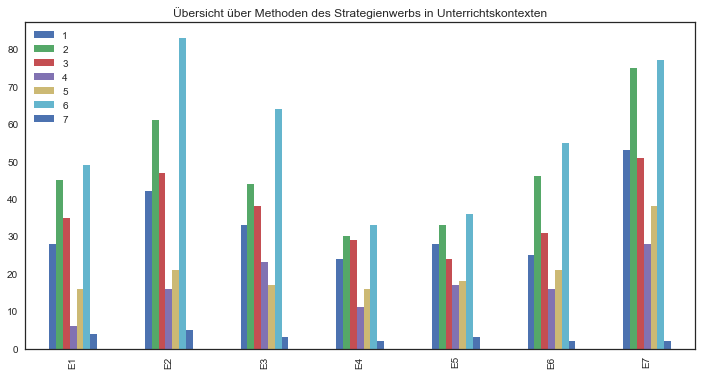

In [169]:
DF_Erwerb.T.plot(kind = 'bar', figsize = (12,6), title = 'Übersicht über Methoden des Strategienwerbs in Unterrichtskontexten');

In [76]:
Finished[erwerb['E8']].apply(sum).sort_values(ascending = False)

B-Q2-8_3    51
B-Q2-8_2    30
B-Q2-8_4    29
B-Q2-8_1    18
B-Q2-8_5     3
dtype: int64

* (1)	He conocido estas estrategias en mi familia.
* (2)	He conocido estas estrategias hablando con amigos/as y conocidos/as.
* (3)	He conocido estas estrategias hablando con compañeros/as de clase.
* (4)	He conocido estas estrategias imitando hábitos de trabajo de compañeros/as de clase aventajados/as.
* (5)	Otros:

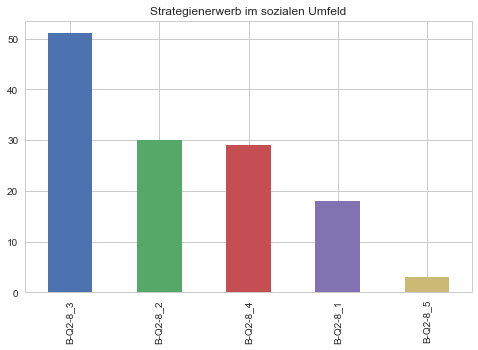

In [77]:
Finished[erwerb['E8']].apply(sum).sort_values(ascending = False).plot(kind='bar', 
                                                                    figsize = (8,5), width = 0.5, 
                                                                    legend = False, title = "Strategienerwerb im sozialen Umfeld");

In [78]:
Finished[erwerb['E9']].apply(sum).sort_values(ascending = False)

B-Q2-9_1    131
B-Q2-9_2    115
B-Q2-9_3     39
B-Q2-9_4     37
B-Q2-9_5      9
dtype: int64

* (1)	He desarrollado estas estrategias por mi cuenta durante el aprendizaje y el uso de idiomas, p. ej. leyendo textos difíciles.
* (2)	He probado diferentes cosas y me he dado cuenta de qué funciona mejor para mi.
* (3)	He aprendido estas estrategias con ayuda de páginas web o blogs.
* (4)	He aprendido estas estrategias con ayuda de libros.
* (5)	He aprendido estas estrategias con ayuda de otros materiales. (Opcional: Cuáles?)

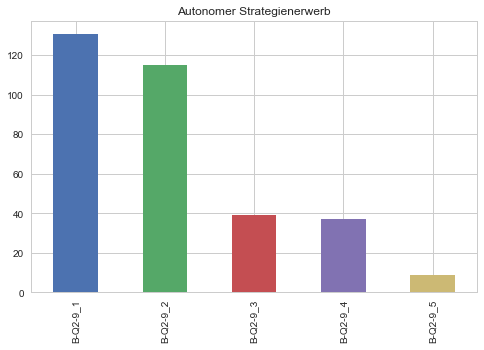

In [79]:
Finished[erwerb['E9']].apply(sum).sort_values(ascending = False).plot(kind='bar', 
                                                                    figsize = (8,5), width = 0.5, 
                                                                    legend = False, title = "Autonomer Strategienerwerb");

##### Übersicht über Methoden des Strategienerwerbs in Unterrichtskontexten

In [170]:
Finished[Finished['IPAddress']!='2.154.100.40'][erwerb1['U1']].apply(pd.value_counts).astype(integer).iloc[1].sum()

233

In [171]:
Erwerb_U = []
for lst in erwerb1:
        Erwerb_U.append(Finished[Finished['IPAddress']!='2.154.100.40'][erwerb1[lst]].apply(pd.value_counts).astype(integer).iloc[1].sum())

In [172]:
Erwerb_U

[233, 334, 255, 117, 147, 397, 21]

In [173]:
Erwerb_U = pd.Series(Erwerb_U)

In [174]:
Erwerb_U.index += 1

In [175]:
Erwerb_U.sort_values(ascending = False)

6    397
2    334
3    255
1    233
5    147
4    117
7     21
dtype: int64

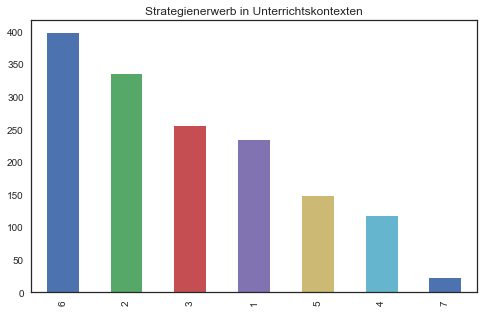

In [176]:
Erwerb_U.sort_values(ascending = False).plot(kind='bar', 
                                        figsize = (8,5), width = 0.5, 
                                        legend = False, title = "Strategienerwerb in Unterrichtskontexten");

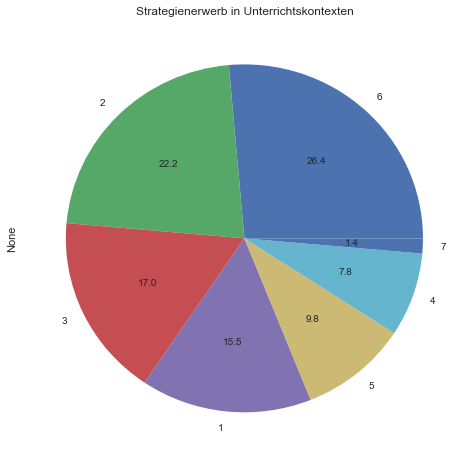

In [177]:
Erwerb_U.sort_values(ascending = False).plot(kind='pie', 
                                        figsize = (8,8), autopct='%.1f',
                                        legend = False, title = "Strategienerwerb in Unterrichtskontexten");

* (1)	Las estrategias se presentaron (y explicaron) en clase.
* (2)	El/La profesor/a dio consejos sobre cómo familiarizarse de manera autónoma con estas estrategias, p. ej. mediante páginas web, libros u otros materiales que explican estrategias de aprendizaje. 
* (3)	Estas estrategias se explicaron y practicaron con ejemplos concretos, realizando tareas, p. ej. leyendo un texto difícil.
* (4)	Se probaron y se compararon diferentes estrategias.
* (5)	Se reflexionó sobre el uso de estas estrategias, p. ej. sobre qué estrategia sería adecuada en una situación y/o para una persona determinada.
* (6)	Durante las clases he aprendido estas estrategias de manera inconsciente, p. ej. mientras leía textos difíciles, sin explicación o indicación del/de la profesor/a.
* (7)	Otros:

##### Untersuchung der Relation zwischen Strategienerwerb und -anwendung

In [88]:
Stud_U.sort_values(ascending=False)

6    162
2    141
3    105
1    102
5     63
4     50
dtype: int64

In [89]:
get_good_str(Stud_U1)

(70, 68.62745098039215)

In [90]:
get_good_str(Stud_U2)

(99, 70.2127659574468)

In [91]:
get_good_str(Stud_U3)

(74, 70.47619047619048)

In [92]:
get_good_str(Stud_U4)

(35, 70.0)

In [93]:
get_good_str(Stud_U5)

(47, 74.60317460317461)

In [94]:
get_good_str(Stud_U6)

(105, 64.81481481481481)

In [95]:
get_good_str(Stud_E8)

(47, 70.1492537313433)

In [96]:
get_good_str(Stud_E9)

(104, 62.65060240963856)

#### B-Q3 + B-Q4 (Strategienwerb im Rahmen der Befragung)

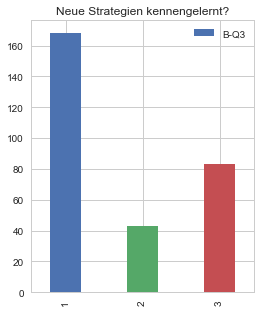

In [97]:
Finished['B-Q3'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Neue Strategien kennengelernt?");

(1) Ja
(2) Nein
(3) Vielleicht

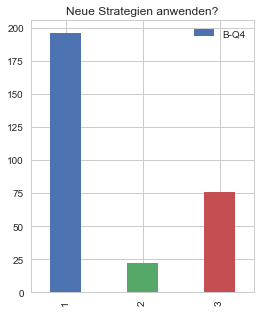

In [98]:
Finished['B-Q4'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Neue Strategien anwenden?");

### Einstellung zu Erschließungsstrategien

#### C-Q1

In [99]:
Finished[Liste_C_Q1].describe()

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,3.448980,3.612245,3.744898,4.394558,4.391156,4.299320,2.554422
std,0.891244,1.108139,1.105165,0.830788,0.788174,0.845909,1.178055
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000
50%,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,2.000000
75%,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


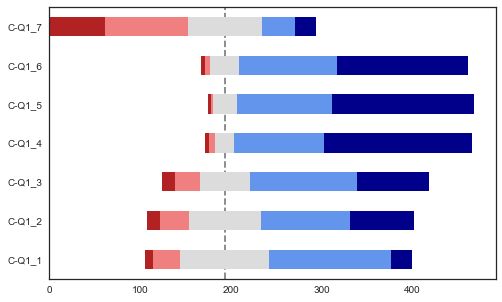

In [152]:
graf_likert(Finished,Liste_C_Q1,5)

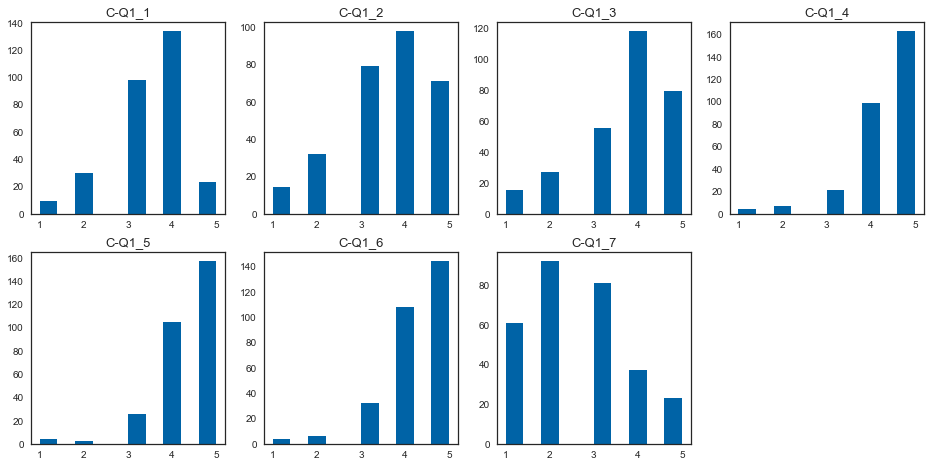

In [153]:
graf_hist(Finished,Liste_C_Q1,16,12,3,4)

1
Pienso que en alemán utilizo estas estrategias con éxito. 

2
Estas estrategias son un tema importante en mis clases de alemán.

3
Utilizo estas estrategias a menudo fuera del aula, p. ej. cuando leo textos en alemán en mi tiempo libre.

4
Estas estrategias son útiles para ampliar el vocabulario en alemán.

5
Estas estrategias son útiles para entender mejor textos en alemán.

6
Estas estrategias deberían explicarse y practicarse en las clases de alemán.

7
No hace falta aprender estas estrategias, ya que las usamos en cualquier caso de forma inconsciente. 


Korrelation in C-Q1:

In [101]:
Korr_C_Q1 = Daten[Liste_C_Q1].corr(method = 'spearman')
Korr_C_Q1

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7
C-Q1_1,1.000000,0.166330,0.460826,0.364827,0.381106,0.177434,0.160711
C-Q1_2,0.166330,1.000000,0.070945,0.269025,0.341017,0.300581,-0.005052
C-Q1_3,0.460826,0.070945,1.000000,0.258157,0.365397,0.121001,0.129022
C-Q1_4,0.364827,0.269025,0.258157,1.000000,0.585881,0.301667,-0.103350
C-Q1_5,0.381106,0.341017,0.365397,0.585881,1.000000,0.357846,-0.033119
C-Q1_6,0.177434,0.300581,0.121001,0.301667,0.357846,1.000000,-0.118782
C-Q1_7,0.160711,-0.005052,0.129022,-0.103350,-0.033119,-0.118782,1.000000


In [102]:
for col in Liste_C_Q1:
    print(get_max_corr(Korr_C_Q1,col,0.5))

Series([], Name: C-Q1_1, dtype: float64)
Series([], Name: C-Q1_2, dtype: float64)
Series([], Name: C-Q1_3, dtype: float64)
C-Q1_5    0.585881
Name: C-Q1_4, dtype: float64
C-Q1_4    0.585881
Name: C-Q1_5, dtype: float64
Series([], Name: C-Q1_6, dtype: float64)
Series([], Name: C-Q1_7, dtype: float64)
